 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
df_whales = pd.read_csv("whale_returns.csv")
df_whales['Date'] = pd.to_datetime(df_whales["Date"], dayfirst = True)
df_whales.set_index(df_whales['Date'], inplace=True)
df_whales.drop(columns=['Date'],inplace=True)
df_whales.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
df_whales.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
df_whales.dropna(inplace = True)
df_whales


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv')
algo_returns['Date'] = pd.to_datetime(algo_returns["Date"], dayfirst = True)
algo_returns.set_index(algo_returns['Date'], inplace=True)
algo_returns.drop(columns=['Date'],inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace= True)



In [8]:
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
#sp500 = pd.read_csv('sp500_history.csv' , index_col = 'Date')
sp500 = pd.read_csv('sp500_history.csv')
#sp500_history_csv = Path("Resources/sp500_history.csv")
sp500['Date'] = pd.to_datetime(sp500["Date"], dayfirst = True)
sp500.set_index(sp500['Date'], inplace=True)
sp500.drop(columns=['Date'],inplace=True)
sp500['Close'] = sp500['Close'].str.replace('$', '' , regex = True)
sp500['Close']
sp500  = sp500.sort_values("Date", ascending=True)
sp500.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [10]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
#sp500['Close'] = sp500['Close'].str.replace("$" , "", regex = True )
#sp500['Daily_returns'] = sp500['Close'].map(float)
sp500['Close'] = sp500['Close'].astype(float)


In [12]:
# Calculate Daily Returns
## Calculate daily returns for each portfolio
sp500['SP500_Daily_Returns'] = sp500['Close'].pct_change(1)
sp500['SP500_Daily_Returns']

Date
2012-10-01         NaN
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
                ...   
2019-04-16    0.000509
2019-04-17   -0.002274
2019-04-18    0.001579
2019-04-22    0.001012
2019-04-23    0.008841
Name: SP500_Daily_Returns, Length: 1649, dtype: float64

In [13]:
# Drop nulls
#sp500['Daily_returns'].dropna()
sp500['SP500_Daily_Returns'].dropna(inplace = True)
sp500.drop(columns=['Close'],inplace=True)
sp500

,SP500_Daily_Returns
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.

sp500[['SP500_Daily_Returns']] 

,SP500_Daily_Returns
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
group_analysis  = pd.concat([algo_returns, df_whales , sp500], axis = 'columns' , join = 'inner')

group_analysis

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944
...,...,...,...,...,...,...,...
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944
...,...,...,...,...,...,...,...
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,0.001579


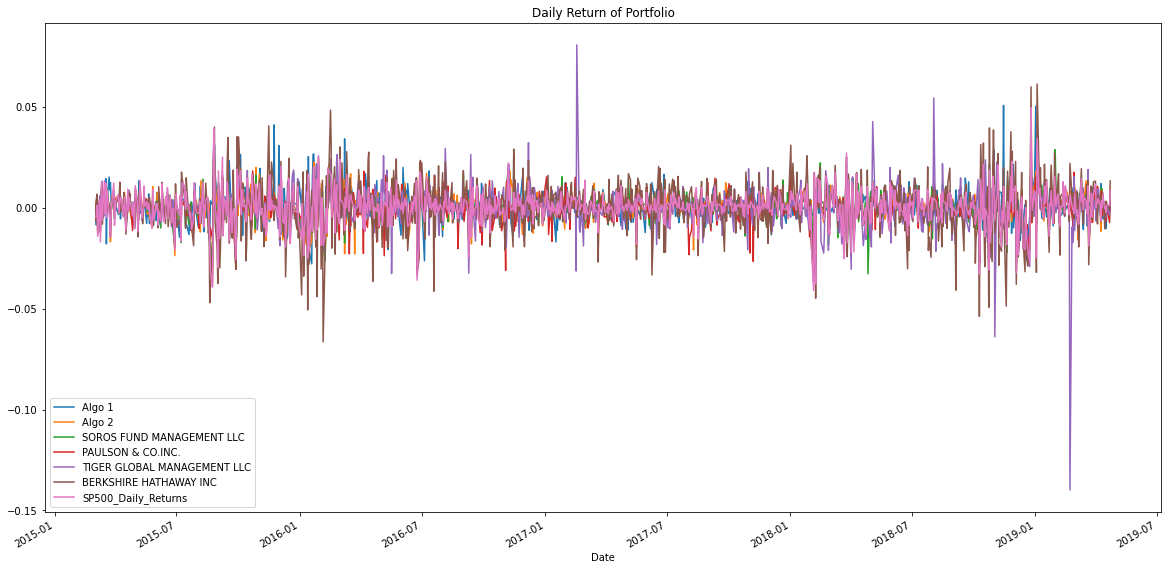

In [16]:
# Plot daily returns of all portfolios
group_analysis.plot(title ="Daily Return of Portfolio" , figsize=(20,10))
group_analysis

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

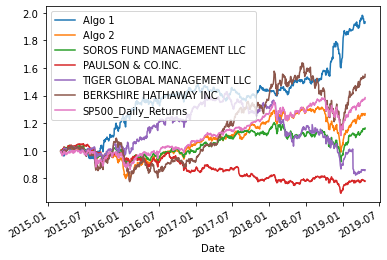

In [17]:
# Calculate cumulative returns of all portfolios
ga_cum_returns = (1 + group_analysis ).cumprod()
#Plot cumulative returns
ga_cum_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

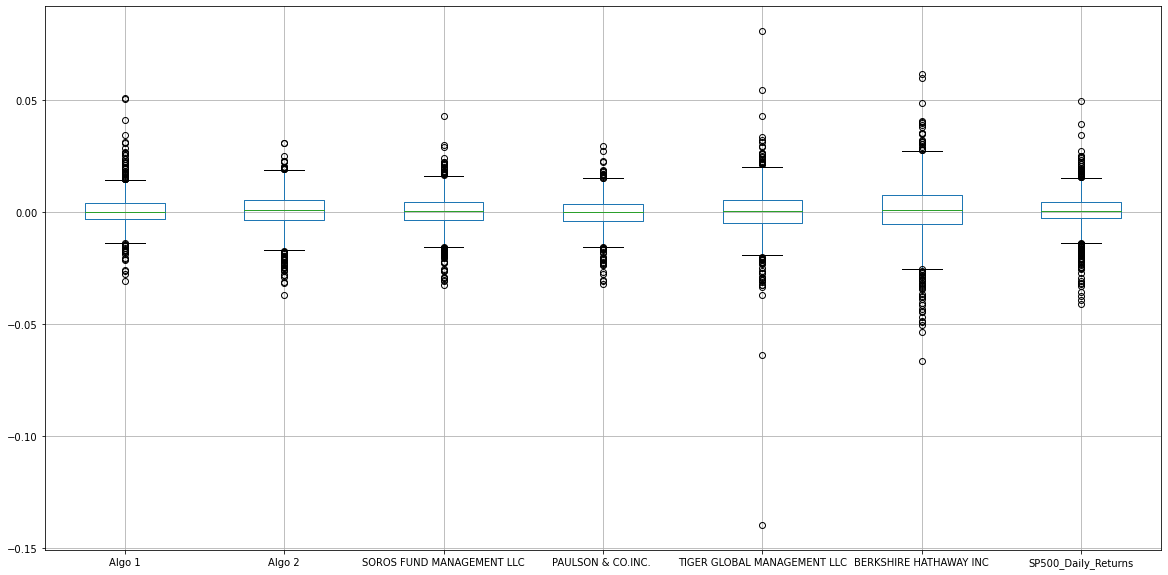

In [18]:
# Box plot to visually show risk
# std_devs = [group_analysis[i].std() for i in group_annalysis.columns]
box = group_analysis
box.boxplot(figsize = (20 , 10))

### Calculate Standard Deviationsstd

In [19]:
# Calculate the daily standard deviations of all portfolios

all_portfolio_std = group_analysis.std()

                                      


### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard dev('iation of S&P 500
standard_dev_sp500 = sp500.std()
# Determine which portfolios are riskier than the S&P 500
riskier = all_portfolio_std[all_portfolio_std > all_portfolio_std['SP500_Daily_Returns']]

riskier


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)

annual_ga_std = all_portfolio_std * np.sqrt(252)
annual_ga_std


Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
SP500_Daily_Returns            0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

plot rolling std for all portfolios with 21-day### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Std for all portfolios'}, xlabel='Date'>

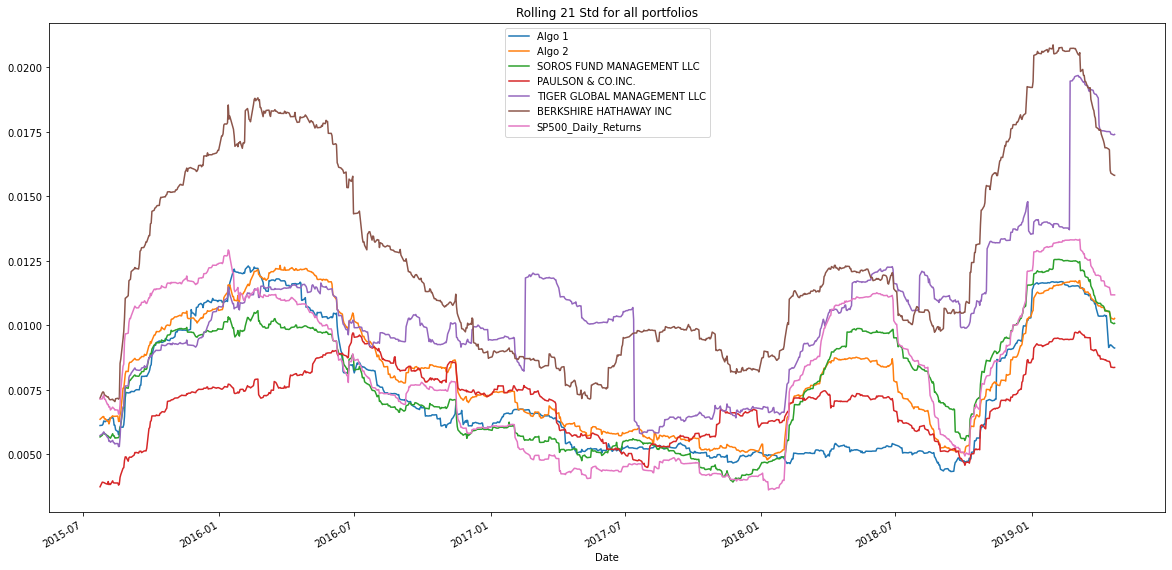

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21Day_ga = group_analysis.rolling(window=101).std().plot(title = "Rolling 21 Std for all portfolios" , figsize = (20,10))
rolling_21Day_ga

### Calculate and plot the correlation

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Daily_Returns
Algo 1,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,0.279494
Algo 2,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,0.858764
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.837864
PAULSON & CO.INC.,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423,0.623946
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000,0.751371
SP500_Daily_Returns,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371,1.000000


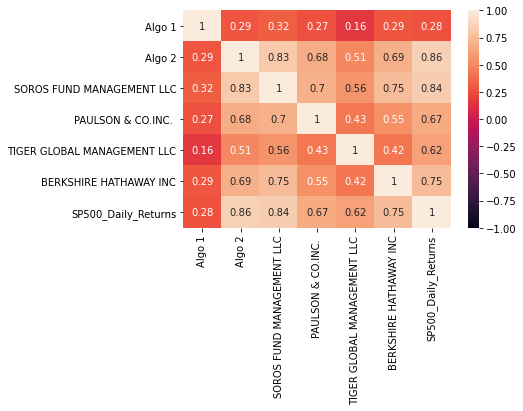

In [23]:
# Calculate the correlation
#group_analysis.columns
correlation = group_analysis.corr()
# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation



### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [24]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

covariance = group_analysis['Algo 2'].cov(group_analysis['SP500_Daily_Returns'])
variance = group_analysis['SP500_Daily_Returns'].var()
beta = covariance / variance
beta


0.8375345402757753

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

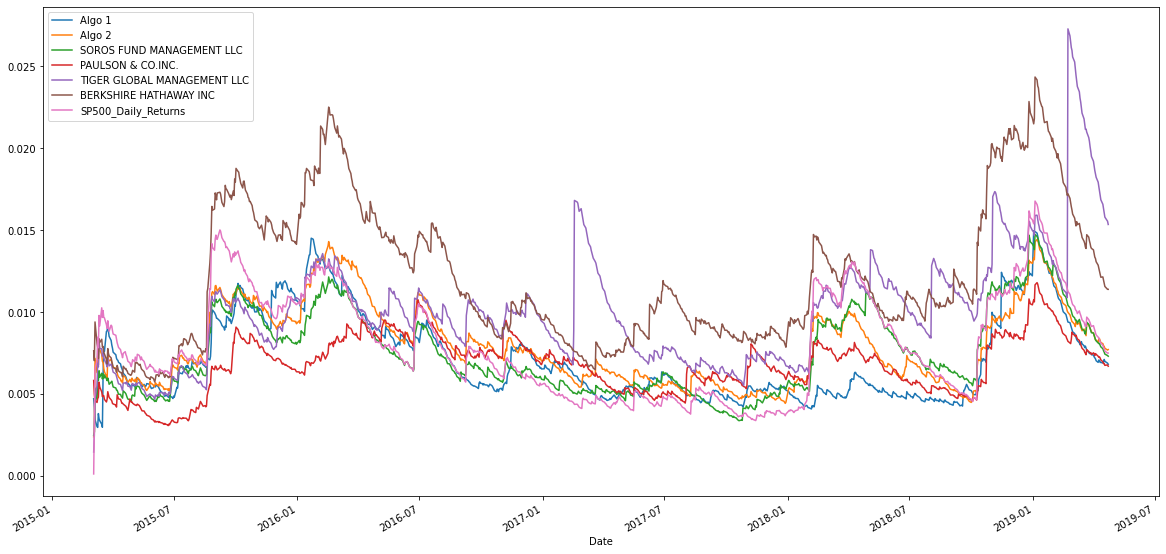

In [25]:
# Use `ewm` to calculate the rolling window
group_analysis.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (group_analysis.mean() * 252) / all_portfolio_std * np.sqrt(252)
[sharpe_ratios]


[Algo 1                         347.419418
 Algo 2                         126.343642
 SOROS FUND MANAGEMENT LLC       89.817051
 PAULSON & CO.INC.             -121.859610
 TIGER GLOBAL MANAGEMENT LLC    -30.507024
 BERKSHIRE HATHAWAY INC         156.696151
 SP500_Daily_Returns            163.363399
 dtype: float64]

<AxesSubplot:title={'center':'Sharpe Ratios'}>

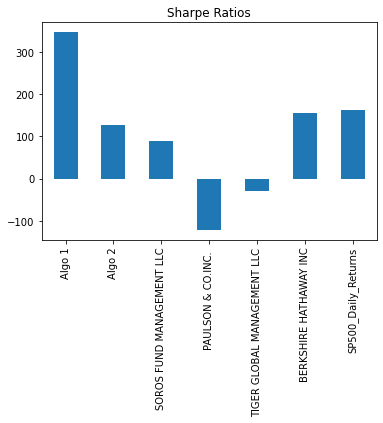

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind ='bar',title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here! Algo 1 performs better. Algo 2 is behind Berkshire and S&P 500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stocks
goog_csv = Path(r"C:\Users\Lambo\jupyter-workspace\python-homework\googlo.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_df.drop(columns=['GOOG1'], axis=1, inplace = True)

In [29]:
# Reading data from 1st stocks
aapl = Path(r"C:\Users\Lambo\jupyter-workspace\python-homework\AAPL.csv")
aapl_his = pd.read_csv(aapl, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_his.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_his.drop(columns=['AAPL1'], axis=1, inplace = True)


In [30]:
# Reading data from 3rd stock
cost= Path(r"C:\Users\Lambo\jupyter-workspace\python-homework\COST.csv")
cost_his = pd.read_csv(cost, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_his.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_his.drop(columns=['COST1'], axis=1, inplace = True)

In [31]:
# Combine all stocks in a single DataFrame
#group_stocks = pd.concat([goog, cost , aapl]  ,join = 'inner')
group_stock = pd.concat([goog_df, aapl_his, cost_his], axis='columns', join='inner')
group_stock.head()


#group_stocks

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [32]:
# Reset Date index
#aapl.drop(columns=['Date'],inplace=True)
#group_stocks = df_marks.drop(['Open', 'High' , 'Low' , 'Volume'], axis=1)
group_stock.reset_index(drop=True)
#group_stocks[['Close']]

,GOOG,AAPL,COST
0,1162.38,200.72,243.47
1,1166.27,202.90,241.34
2,1174.10,202.86,240.18
3,1189.39,208.48,244.23
4,1185.40,211.75,244.62
...,...,...,...
245,1078.59,186.99,199.60
246,1081.77,188.18,198.71
247,1079.23,186.44,195.48
248,1100.20,188.15,195.88


In [33]:
## Reorganize portfolio data by having a column per symbol

# Reset Date index
group_stock.sort_index(inplace=True)
group_stock.head()


,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [34]:
# Calculate daily returns
daily_returns = group_stock.pct_change()
daily_returns.head()


# Drop NAs
daily_returns.dropna(inplace = True)

# Display sample data
daily_returns

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
...,...,...,...
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)
custom = pd.DataFrame(portfolio_returns)
custom.head()


,0
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
# Join your returns DataFrame to the original returns DataFrame
# Only compare dates where return data exists for all the stocks (drop NaNs)

total_stock = pd.concat([portfolio_returns, group_analysis], axis='columns', join = 'inner')
total_stock.rename(columns= {0: "Custom"},inplace = True )
total_stock.dropna(inplace=True)
total_stock.sort_index()
total_stock.head()



,Custom,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Daily_Returns
2018-05-14,0.000015,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.010064,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009403,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.001595,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.006061,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
total_stock.std()
annualized_variance = (total_stock.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std



Custom                         0.211496
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
SP500_Daily_Returns            0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

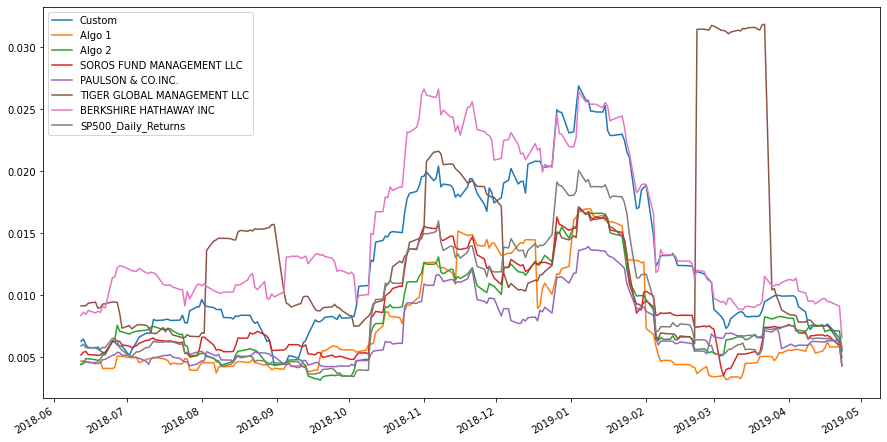

In [39]:
# Calculate rolling standard deviation
# Calculate rolling standard deviation
# Plot rolling standard deviation

total_stock.rolling(window=21).std().plot(figsize=(15,8))

# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

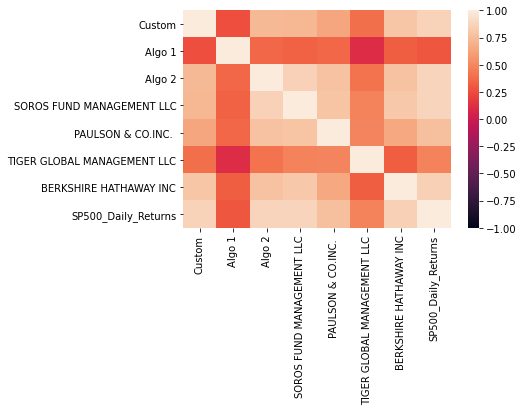

In [40]:
# Calculate and plot the correlation
#all_returns.corr().plot()
correlation = total_stock.corr()
correlation
sns.heatmap(correlation, vmin=-1, vmax=1,)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60day Beta'}>

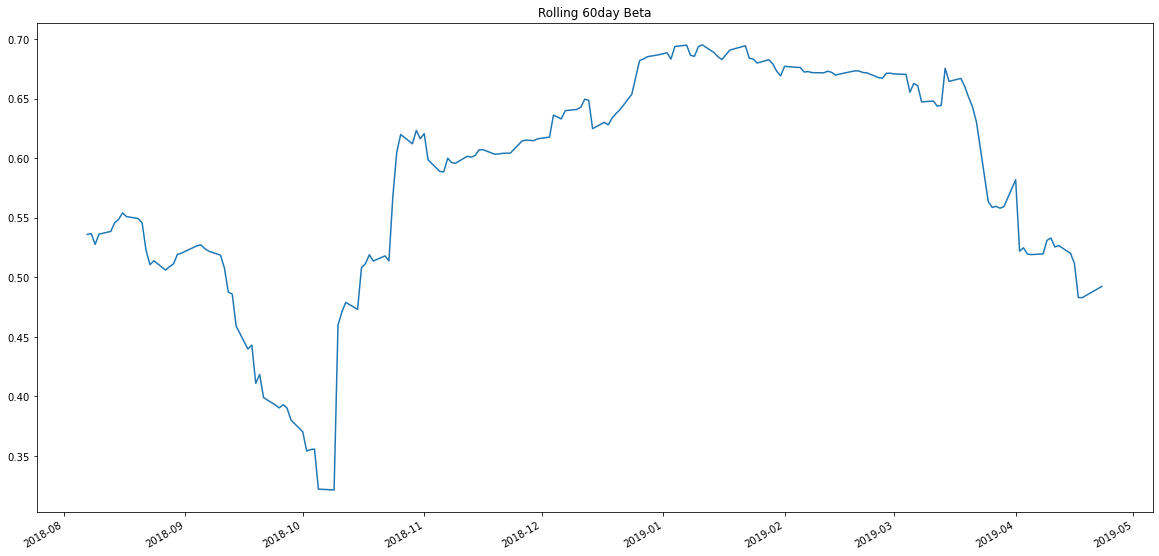

In [41]:
# Calculate and plot Beta
rolling_variance = total_stock['Custom'].rolling(window=60).var()
rolling_covariance = total_stock['Custom'].rolling(window=60).cov(total_stock['SP500_Daily_Returns'])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60day Beta')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_all = (total_stock.mean() * 252) / ((total_stock).std() * np.sqrt(252))
sharpe_ratios_all


Custom                         0.933123
Algo 1                         2.035665
Algo 2                         0.080607
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
SP500_Daily_Returns            0.584820
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

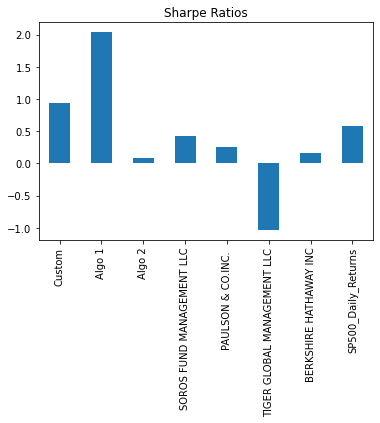

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios")


### How does your portfolio do?

Write your answer here!

In [44]:
#Algo 1 is the most successful portfolio.
#Algo 2 is the second to least successful!!!